# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [51]:
import pandas as pd
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [52]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [53]:
#Your code here
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

X = df.drop('list_price', axis=1)
y = df['list_price']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2)

data = pd.concat([X, y], axis=1)

outcome = 'list_price'
x_cols = list(X.columns)
predictors = ' + '.join(x_cols)
formula = outcome + " ~ " + predictors
model = ols(formula=formula, data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     726.2
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:32:56   Log-Likelihood:                -54056.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10775   BIC:                         1.090e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2821      1.551     41.435      0.000      61.241      67.323
piece_count                                         75.7184      0.776     97.605      0.000      74.198      77.239
num_reviews                                          6.4270      0.590     10.888      0.000       5.270       7.584
play_star_rating                                     5.2682      0.542      9.717      0.000       4.205       6.331
star_rating                                         -1.4380      0.617     -2.331      0.020      -2.647      -0.229
val_star_rating                                     -8.5504      0.550    -15.545      0.000      -9.628      -7.472
ages_10plus                                        122.9923      5.753     21.378      0.000     111.715     134.270
ages_10_14                                         -23.1648      7.788     -2.975      0.003     -38.430      -7.899
ages_10_16                                         -11.7969      3.528     -3.343      0.001     -18.713      -4.881
ages_10_21                                          55.9674      6.415      8.725      0.000      43.393      68.542
ages_11_16                                         -18.2277      5.058     -3.604      0.000     -28.141      -8.314
ages_12plus                                         70.5837      4.828     14.619      0.000      61.119      80.048
ages_12_16                                         -57.4333      5.882     -9.765      0.000     -68.962     -45.904
ages_14plus                                         24.6493      3.579      6.887      0.000      17.634      31.665
ages_16plus                                         32.9512      5.251      6.275      0.000      22.658      43.245
ages_1half_3                                        -9.0486      2.087     -4.336      0.000     -13.139      -4.958
ages_1half_5                                        -4.1380      2.605     -1.588      0.112      -9.244       0.969
ages_2_5                                            14.9724      1.459     10.260      0.000      12.112      17.833
ages_4plus                                         -18.5801      5.504     -3.376      0.001     -29.370      -7.791
ages_4_7                                            -6.1664      2.909     -2.120      0.034     -11.868      -0.465
ages_4_99                                           -3.0337      3.138     -0.967      0.334      -9.185       3.118
ages_5plus                                          -9.6179      2.705     -3.556      0.000     -14.920      -4.316
ages_5_12                                          -34.9818      2.739    -12.771      0.000     -40.351     -29.613
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [54]:
#Your code here
drop_list = ['list_price', 'ages_1half_5', 'ages_4_99', 'ages_5_8', 'ages_6_14', 'ages_7plus', 'ages_9_16', 'theme_name_Angry_Birds', 'theme_name_Creator_3_in_1', 'theme_name_DC_Super_Hero_Girls', 'theme_name_DUPLO', 'theme_name_Elves', 'theme_name_Friends', 'theme_name_Juniors', 'theme_name_NEXO_KNIGHTS', 'theme_name_Power_Functions', 'theme_name_Pteranodon_Chase', 'theme_name_Speed_Champions', 'theme_name_Technic', 'country_AT', 'country_AU', 'country_CH', 'country_GB', 'country_IE', 'country_IT', 'review_difficulty_Very_Easy', 'review_difficulty_unknown']

X = df.drop(drop_list, axis=1)
y = df['list_price']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2)

data = pd.concat([X, y], axis=1)

outcome = 'list_price'
x_cols = list(X.columns)
predictors = ' + '.join(x_cols)
formula = outcome + " ~ " + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     910.4
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:33:00   Log-Likelihood:                -54063.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10794   BIC:                         1.088e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7562      2.106     30.747      0.000      60.628      68.884
piece_count                                         75.7688      0.763     99.312      0.000      74.273      77.264
num_reviews                                          6.5022      0.585     11.111      0.000       5.355       7.649
play_star_rating                                     5.4112      0.531     10.190      0.000       4.370       6.452
star_rating                                         -1.4588      0.606     -2.406      0.016      -2.647      -0.271
val_star_rating                                     -8.4947      0.528    -16.084      0.000      -9.530      -7.459
ages_10plus                                        128.2005      6.586     19.465      0.000     115.291     141.110
ages_10_14                                         -19.3577      8.201     -2.360      0.018     -35.434      -3.281
ages_10_16                                          -8.7326      3.680     -2.373      0.018     -15.947      -1.519
ages_10_21                                          61.6708      7.062      8.733      0.000      47.829      75.513
ages_11_16                                         -15.5409      5.126     -3.032      0.002     -25.590      -5.492
ages_12plus                                         75.0700      5.737     13.085      0.000      63.824      86.316
ages_12_16                                         -54.0781      6.335     -8.536      0.000     -66.496     -41.660
ages_14plus                                         28.5356      4.315      6.613      0.000      20.078      36.993
ages_16plus                                         36.2814      6.010      6.037      0.000      24.501      48.061
ages_1half_3                                        -3.6613      3.116     -1.175      0.240      -9.769       2.446
ages_2_5                                            20.0271      2.309      8.673      0.000      15.501      24.553
ages_4plus                                         -16.2515      8.435     -1.927      0.054     -32.786       0.283
ages_4_7                                            -2.5732      2.415     -1.065      0.287      -7.307       2.161
ages_5plus                                          -8.3651      2.773     -3.017      0.003     -13.801      -2.930
ages_5_12                                          -30.5511      2.755    -11.090      0.000     -35.951     -25.151
ages_6plus                                         -22.6151      5.048     -4.480      0.000     -32.510     -12.721
ages_6_12                                          -17.8101      2.201     -8.093      0.000     -22.124     -13.497
ages_7_12                                

In [55]:
len(drop_list)

27

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [49]:
#Your code here'
from statsmodels.stats.outliers_influence import variance_inflation_factor
Z = df[x_cols]
vif = [variance_inflation_factor(Z.values, i) for i in range(X.shape[1])]

for i in list(zip(x_cols, vif)):
    if i[1]>=5:
        drop_list.append(i[0])


/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [50]:
len(drop_list)

36

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [56]:
#Your code here
#Your code here
X = df.drop(drop_list, axis=1)
y = df['list_price']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2)

data = pd.concat([X, y], axis=1)

outcome = 'list_price'
x_cols = list(X.columns)
predictors = ' + '.join(x_cols)
formula = outcome + " ~ " + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     910.4
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:33:26   Log-Likelihood:                -54063.
No. Observations:               10870   AIC:                         1.083e+05
Df Residuals:                   10794   BIC:                         1.088e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.7562      2.106     30.747      0.000      60.628      68.884
piece_count                                         75.7688      0.763     99.312      0.000      74.273      77.264
num_reviews                                          6.5022      0.585     11.111      0.000       5.355       7.649
play_star_rating                                     5.4112      0.531     10.190      0.000       4.370       6.452
star_rating                                         -1.4588      0.606     -2.406      0.016      -2.647      -0.271
val_star_rating                                     -8.4947      0.528    -16.084      0.000      -9.530      -7.459
ages_10plus                                        128.2005      6.586     19.465      0.000     115.291     141.110
ages_10_14                                         -19.3577      8.201     -2.360      0.018     -35.434      -3.281
ages_10_16                                          -8.7326      3.680     -2.373      0.018     -15.947      -1.519
ages_10_21                                          61.6708      7.062      8.733      0.000      47.829      75.513
ages_11_16                                         -15.5409      5.126     -3.032      0.002     -25.590      -5.492
ages_12plus                                         75.0700      5.737     13.085      0.000      63.824      86.316
ages_12_16                                         -54.0781      6.335     -8.536      0.000     -66.496     -41.660
ages_14plus                                         28.5356      4.315      6.613      0.000      20.078      36.993
ages_16plus                                         36.2814      6.010      6.037      0.000      24.501      48.061
ages_1half_3                                        -3.6613      3.116     -1.175      0.240      -9.769       2.446
ages_2_5                                            20.0271      2.309      8.673      0.000      15.501      24.553
ages_4plus                                         -16.2515      8.435     -1.927      0.054     -32.786       0.283
ages_4_7                                            -2.5732      2.415     -1.065      0.287      -7.307       2.161
ages_5plus                                          -8.3651      2.773     -3.017      0.003     -13.801      -2.930
ages_5_12                                          -30.5511      2.755    -11.090      0.000     -35.951     -25.151
ages_6plus                                         -22.6151      5.048     -4.480      0.000     -32.510     -12.721
ages_6_12                                          -17.8101      2.201     -8.093      0.000     -22.124     -13.497
ages_7_12                                

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

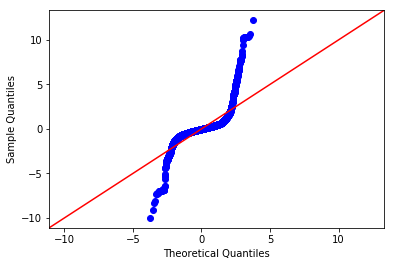

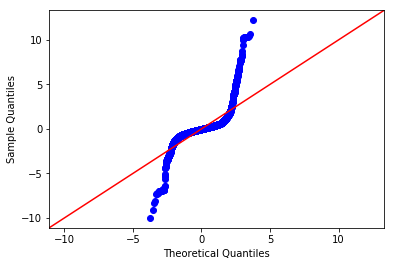

In [58]:
# Your code here
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
fig

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

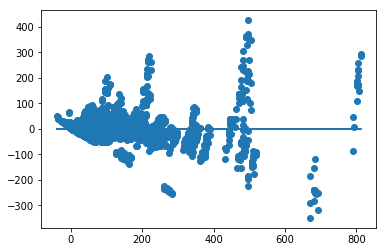

In [62]:
#Your code here
import matplotlib.pyplot as plt
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [61]:
#Your code here


## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 